In [31]:
import numpy as np

from channel_1 import EncoderDecoder
coder = EncoderDecoder(1,16,1)

In [32]:
from Data_Set import data_set
from torch.utils.data import DataLoader
data = data_set(2,2)
dataloader = DataLoader(data, batch_size=8)
print(len(dataloader))
for item in dataloader:
  print(item.shape)
  break

450
torch.Size([8, 23, 512])


In [33]:
from Bi_LSTM import device
model = coder.to(device)

In [34]:
import torch.nn as nn
import torch.optim as optim
epoch_num = 20
loss_fn = nn.MSELoss()
loss_ = []
optimizer_1 = optim.Adam(model.parameters(), lr=0.001)

In [35]:
from tqdm import tqdm
for epoch in range(epoch_num):
    print("epoch:\t", epoch+1)
    with tqdm(total=len(dataloader)) as pbar:
        for item in dataloader:
            item = item.permute(0, 2, 1)
            item = item[:,:,14]
            item = item.unsqueeze(-1)
            item = item.to(device)
            out,_ = model(item)
            loss = loss_fn(item, out)
            optimizer_1.zero_grad()      # 清空之前的梯度
            loss.backward()              # 梯度回传
            optimizer_1.step()           # 更新参数
            loss_.append(loss)
            pbar.update(1)

epoch:	 1


100%|██████████| 450/450 [00:01<00:00, 245.32it/s]


epoch:	 2


100%|██████████| 450/450 [00:01<00:00, 372.23it/s]


epoch:	 3


100%|██████████| 450/450 [00:01<00:00, 357.42it/s]


epoch:	 4


100%|██████████| 450/450 [00:01<00:00, 365.48it/s]


epoch:	 5


100%|██████████| 450/450 [00:01<00:00, 380.82it/s]


epoch:	 6


100%|██████████| 450/450 [00:01<00:00, 381.96it/s]


epoch:	 7


100%|██████████| 450/450 [00:01<00:00, 379.65it/s]


epoch:	 8


100%|██████████| 450/450 [00:01<00:00, 384.90it/s]


epoch:	 9


100%|██████████| 450/450 [00:01<00:00, 384.60it/s]


epoch:	 10


100%|██████████| 450/450 [00:01<00:00, 362.89it/s]


epoch:	 11


100%|██████████| 450/450 [00:01<00:00, 365.74it/s]


epoch:	 12


100%|██████████| 450/450 [00:01<00:00, 364.93it/s]


epoch:	 13


100%|██████████| 450/450 [00:01<00:00, 373.04it/s]


epoch:	 14


100%|██████████| 450/450 [00:01<00:00, 368.83it/s]


epoch:	 15


100%|██████████| 450/450 [00:01<00:00, 372.27it/s]


epoch:	 16


100%|██████████| 450/450 [00:01<00:00, 361.24it/s]


epoch:	 17


100%|██████████| 450/450 [00:01<00:00, 365.53it/s]


epoch:	 18


100%|██████████| 450/450 [00:01<00:00, 370.08it/s]


epoch:	 19


100%|██████████| 450/450 [00:01<00:00, 369.20it/s]


epoch:	 20


100%|██████████| 450/450 [00:01<00:00, 368.83it/s]


In [36]:
import torch
loss_ = torch.tensor(loss_)
loss_ = loss_.to('cpu')
print(loss_)

tensor([5.4692e-01, 5.3243e-01, 1.1143e+00,  ..., 1.2873e-06, 4.8790e-06,
        2.6396e-06])


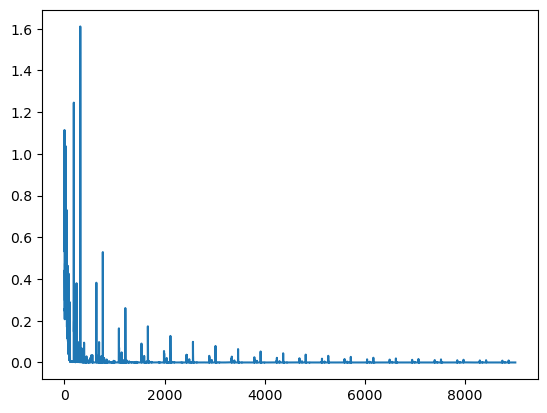

In [37]:
import matplotlib.pyplot as plt
plt.plot(loss_)
plt.show()

In [38]:
model.eval()

EncoderDecoder(
  (encoder): LSTM(1, 16, batch_first=True, bidirectional=True)
  (decoder): LSTM(32, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [39]:
data_test = data_set(2,1)
dataloader_test= DataLoader(data_test, batch_size=8)
print(len(dataloader_test))
for item in dataloader_test:
  print(item.shape)
  break

225
torch.Size([8, 23, 512])


In [40]:
feature_data = []
k=0
for item in dataloader_test:
    item = item.permute(0, 2, 1)
    item = item[:,:,15]
    item = item.unsqueeze(-1)
    item = item.to(device)
    _,feature = model(item)
    k = k+1
    feature_data.append(feature.to('cpu').detach().numpy())
    if k==225:print(feature.shape)
print(k)    

torch.Size([1, 8, 32])
225


In [41]:
import numpy as np
test_fea = np.array(feature_data)
print(test_fea.shape)
test_fea = test_fea.reshape(225*8,32)
print(test_fea.shape)

(225, 1, 8, 32)
(1800, 32)


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(test_fea)

In [43]:
from sklearn.decomposition import PCA

# 假设我们希望降到2D以便于可视化
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_standardized)

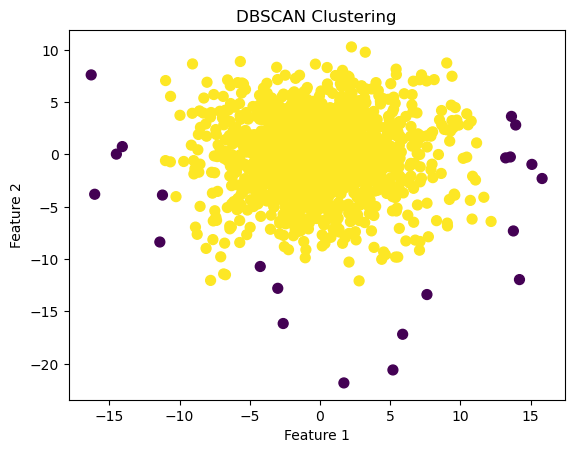

Detected outliers:
[[ 13.560321    -0.23960502]
 [  1.7044019  -21.823223  ]
 [-16.292313     7.6011133 ]
 [ -3.0045211  -12.785504  ]
 [-11.21656     -3.8772058 ]
 [ -2.6178606  -16.1478    ]
 [-14.075741     0.75408703]
 [ 15.095697    -0.94693494]
 [ -4.2527666  -10.70055   ]
 [ 13.776681    -7.306816  ]
 [ 13.640476     3.6373856 ]
 [ 15.822872    -2.2963543 ]
 [  5.890296   -17.175514  ]
 [-14.4988       0.03350364]
 [ 14.210567   -11.95196   ]
 [-11.403498    -8.361986  ]
 [  5.197013   -20.584206  ]
 [-16.04311     -3.800729  ]
 [  7.6199293  -13.380565  ]
 [ 13.225916    -0.3255917 ]
 [ 13.940748     2.8160195 ]]


In [55]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=2.5, min_samples=6)
clusters = dbscan.fit_predict(data_reduced)

# 可视化结果
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 异常值（噪声点）
outliers = data_reduced[clusters == -1]
print("Detected outliers:")
print(outliers)

In [56]:
print(outliers.shape)

(21, 2)


In [57]:
for element in outliers:
    indices = np.where(data_reduced == element)
    if len([0]) > 0:
        print(f"元素 {element} 在数组中的位置是: {indices[0][0]}")
    else:
        print(f"元素 {element} 不在数组中")

元素 [13.560321   -0.23960502] 在数组中的位置是: 318
元素 [  1.7044019 -21.823223 ] 在数组中的位置是: 390
元素 [-16.292313    7.6011133] 在数组中的位置是: 391
元素 [ -3.0045211 -12.785504 ] 在数组中的位置是: 420
元素 [-11.21656    -3.8772058] 在数组中的位置是: 421
元素 [ -2.6178606 -16.1478   ] 在数组中的位置是: 445
元素 [-14.075741     0.75408703] 在数组中的位置是: 446
元素 [15.095697   -0.94693494] 在数组中的位置是: 752
元素 [ -4.2527666 -10.70055  ] 在数组中的位置是: 761
元素 [13.776681 -7.306816] 在数组中的位置是: 769
元素 [13.640476   3.6373856] 在数组中的位置是: 815
元素 [15.822872  -2.2963543] 在数组中的位置是: 827
元素 [  5.890296 -17.175514] 在数组中的位置是: 1500
元素 [-14.4988       0.03350364] 在数组中的位置是: 1501
元素 [ 14.210567 -11.95196 ] 在数组中的位置是: 1510
元素 [-11.403498  -8.361986] 在数组中的位置是: 1511
元素 [  5.197013 -20.584206] 在数组中的位置是: 1532
元素 [-16.04311   -3.800729] 在数组中的位置是: 1533
元素 [  7.6199293 -13.380565 ] 在数组中的位置是: 1537
元素 [13.225916  -0.3255917] 在数组中的位置是: 1621
元素 [13.940748   2.8160195] 在数组中的位置是: 1720
